<a href="https://colab.research.google.com/github/Onyimatics/Image_Classification_Feed_Forward_Neural_Network_Fashionn_Mnist_Dataset/blob/master/DL_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras import layers
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, InputLayer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.optimizers import Adam
from keras import regularizers

In [ ]:


# load in the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# make sure that the data is all the right shape
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.reshape(x_train, (60000, 28, 28, 1))
x_test = np.reshape(x_test, (10000, 28, 28, 1))

# One hot encode the output data
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6977 - loss: 0.8822 - val_accuracy: 0.8232 - val_loss: 0.5065
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8333 - loss: 0.4754 - val_accuracy: 0.8382 - val_loss: 0.4603
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8486 - loss: 0.4336 - val_accuracy: 0.8408 - val_loss: 0.4484
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8561 - loss: 0.4156 - val_accuracy: 0.8443 - val_loss: 0.4407
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8584 - loss: 0.3999 - val_accuracy: 0.8469 - val_loss: 0.4391
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8607 - loss: 0.3898 - val_accuracy: 0.8448 - val_loss: 0.4296
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8652 - loss: 0.3852 - val_accuracy: 0.8440 - val_loss: 0.4471
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8638 - loss: 0.383

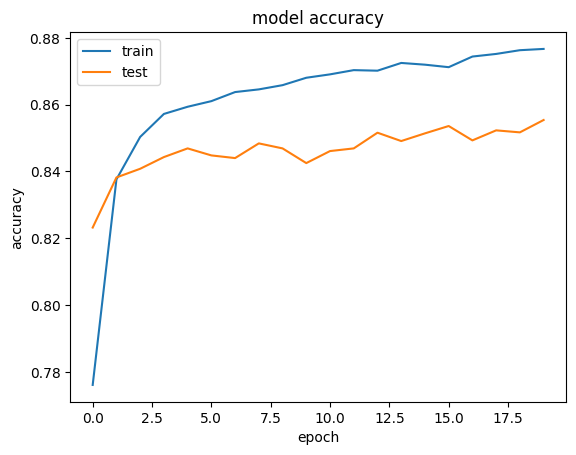

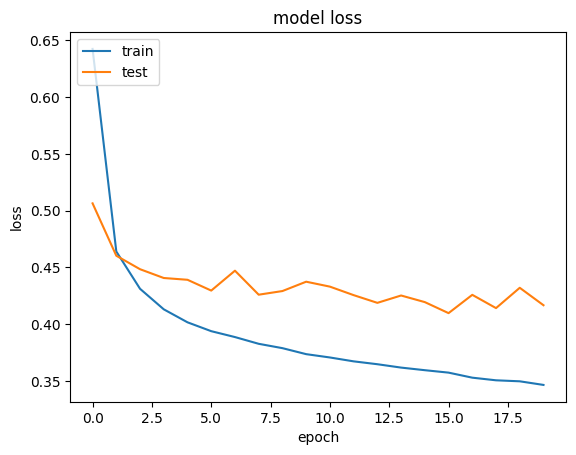

In [ ]:
# Create, compile and fit the model with the original MNIST data
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

# plot the history of the training
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#**OPTIMIZATION**

##**DATA AUGMENTATION**

In [ ]:
# setup the generator that will augment the images
train_gen = ImageDataGenerator(rotation_range=8,   # rotate
                               width_shift_range=0.08,  # width shiift
                               shear_range=0.3,   # shear
                               height_shift_range=0.08, # height shift
                               zoom_range=0.08 )   # zoom


# Generate aungemnted images for the training data
x_train = np.reshape(x_train, (60000,28,28,1))
training_set = train_gen.flow(x_train, y_train, batch_size=x_train.shape[0])

# Generate aungemnted images for the test data
x_test = np.reshape(x_test, (10000,28,28,1))
test_set= train_gen.flow(x_test, y_test, batch_size=x_test.shape[0])

# extract the augmented images from the output flow of the generator
# add the augmented images generated from the training data to the original training data
i = 0
for x, y in training_set:
  if i < 2:
    print(i)
    x_train = np.concatenate((x_train, x))
    y_train = np.concatenate((y_train, y))
    print(x_train.shape)
    print(y_train.shape)
  else:
    break
  i += 1

# add the augmented images generated from the test data to the original test data
i = 0
for x, y in test_set:
  if i < 2:
    print(i)
    x_test_aug = np.concatenate((x_test, x))
    y_test_aug = np.concatenate((y_test, y))
    print(x_test.shape)
    print(y_test.shape)
  else:
    break
  i += 1

0
(120000, 28, 28, 1)
(120000, 10)
1
(180000, 28, 28, 1)
(180000, 10)
0
(10000, 28, 28, 1)
(10000, 10)
1
(10000, 28, 28, 1)
(10000, 10)


##**MODEL SELECTION**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         803,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 844,234 (3.22 MB)

 Trainable params: 843,722 (3.22 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6417 - loss: 1.0626 - val_accuracy: 0.8580 - val_loss: 0.4549
Epoch 2/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8074 - loss: 0.5712 - val_accuracy: 0.8799 - val_loss: 0.3807
Epoch 3/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8365 - loss: 0.4918 - val_accuracy: 0.8907 - val_loss: 0.3453
Epoch 4/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8542 - loss: 0.4448 - val_accuracy: 0.9004 - val_loss: 0.3208
Epoch 5/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8660 - loss: 0.4100 - val_accuracy: 0.9037 - val_loss: 0.3072
Epoch 6/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8734 - loss: 0.3873 - val_accuracy: 0.9084 - val_loss: 0.2939
Epoch 7/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8819 - loss: 0.3648 - val_accuracy: 0.9133 - val_loss: 0.2839
Epoch 8/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8878 - loss: 0.3470 - val_accura

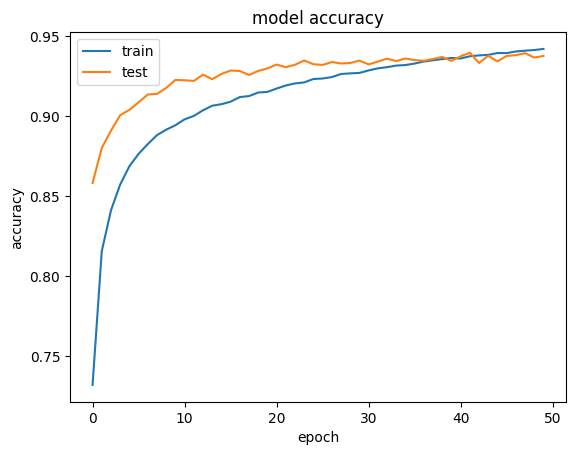

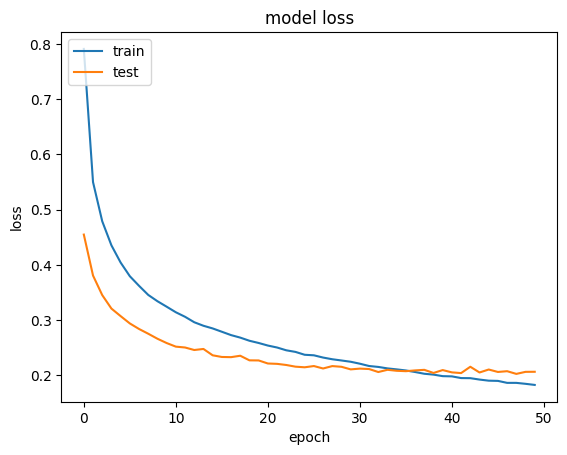

In [ ]:
# Create, compile and fit the model with the original MNIST data
model = keras.Sequential()
model.add(Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=10, activation='softmax'))

model.summary()

opt = Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=250, validation_data = (x_test, y_test), verbose=1)

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# print("Epoch | Train Accuracy | Validation Accuracy")
# for i, (train_acc, val_acc) in enumerate(zip(history.history['accuracy'], history.history['val_accuracy']), start=1):
#     print(f"{i:5d} | {train_acc:.4f}        | {val_acc:.4f}")

print("Epoch | Validation Accuracy")
for i, (train_acc, val_acc) in enumerate(zip(history.history['accuracy'], history.history['val_accuracy']), start=1):
    print(f"{i:5d}     | {val_acc:.4f}")

Epoch | Validation Accuracy
    1     | 0.8580
    2     | 0.8799
    3     | 0.8907
    4     | 0.9004
    5     | 0.9037
    6     | 0.9084
    7     | 0.9133
    8     | 0.9137
    9     | 0.9174
   10     | 0.9224
   11     | 0.9222
   12     | 0.9218
   13     | 0.9257
   14     | 0.9229
   15     | 0.9261
   16     | 0.9283
   17     | 0.9280
   18     | 0.9255
   19     | 0.9280
   20     | 0.9296
   21     | 0.9320
   22     | 0.9304
   23     | 0.9319
   24     | 0.9346
   25     | 0.9322
   26     | 0.9318
   27     | 0.9336
   28     | 0.9327
   29     | 0.9330
   30     | 0.9345
   31     | 0.9321
   32     | 0.9339
   33     | 0.9357
   34     | 0.9342
   35     | 0.9358
   36     | 0.9348
   37     | 0.9344
   38     | 0.9355
   39     | 0.9368
   40     | 0.9343
   41     | 0.9372
   42     | 0.9394
   43     | 0.9330
   44     | 0.9375
   45     | 0.9340
   46     | 0.9374
   47     | 0.9379
   48     | 0.9391
   49     | 0.9364
   50     | 0.9374


In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Validation Accuracy: {acc:.4f}")

Final Validation Accuracy: 0.9374


In [ ]:
# clear session
keras.backend.clear_session()

#**PRESENTATION**

###**INTODUCING FASHION MNIST DATASET**

- There are 60,000 training images and 10,000 test images, each labeled with one of 10 classes.

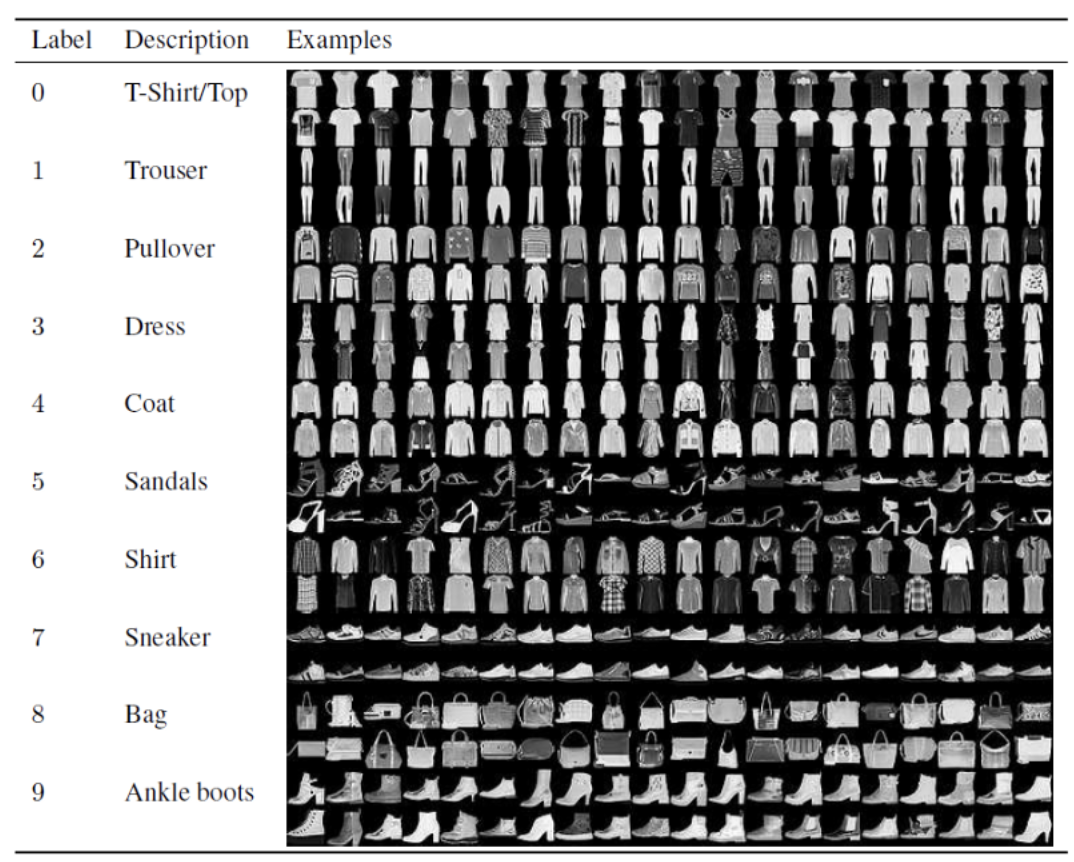

###**MODEL STRUCTURE**

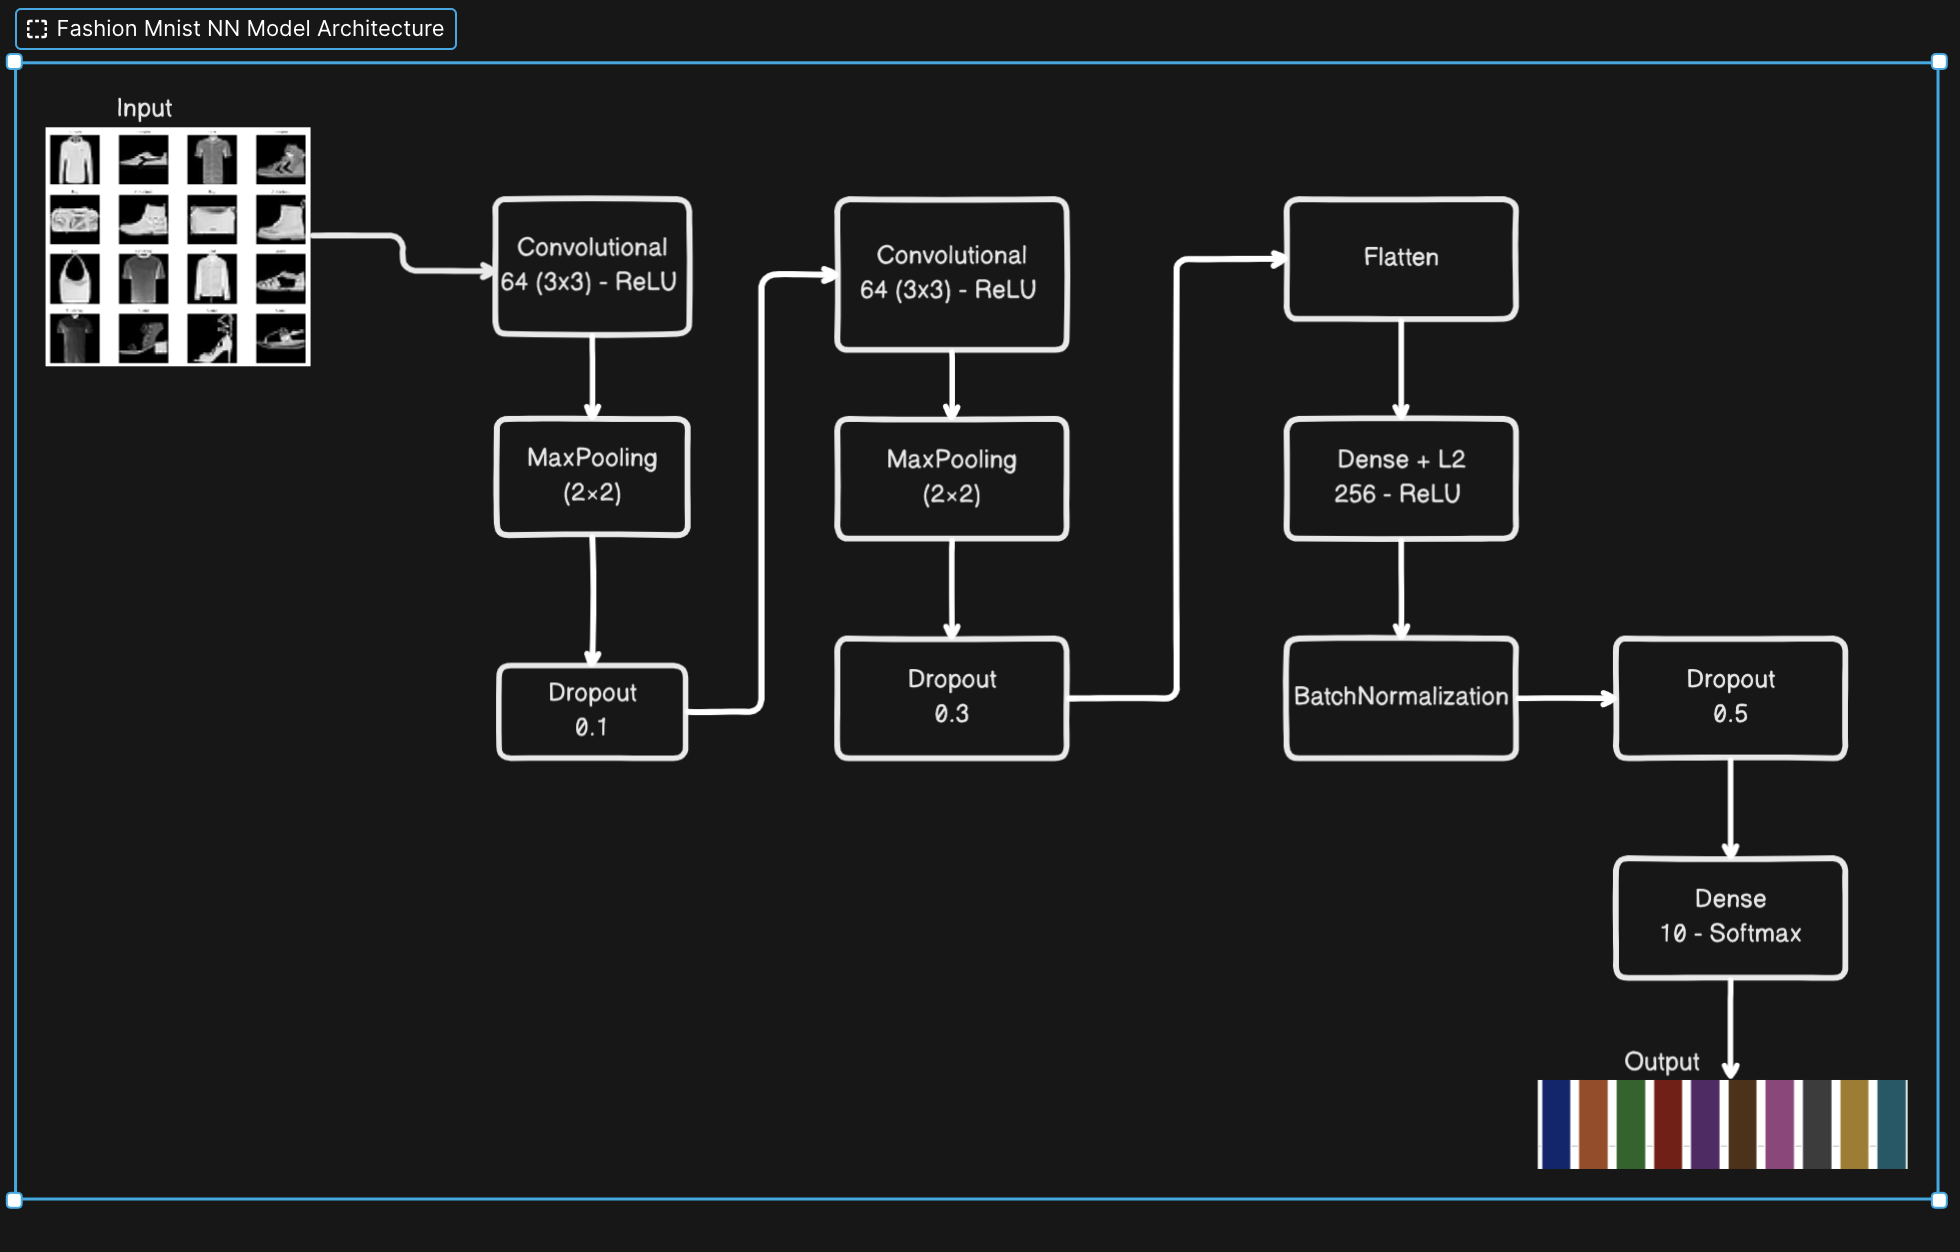

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame({
    "Train Accuracy": history.history["accuracy"],
    "Test Accuracy": history.history["val_accuracy"]
})

fig = px.line(df,
              x=df.index,
              y=["Train Accuracy", "Test Accuracy"],
              template="plotly_dark",
              labels={"value": "Accuracy", "index": "Epoch", "variable": "Metric"},
              color_discrete_sequence=['#3D89BD','#FF9A45'],
              width=1000, height=500
              )
fig.update_layout(
    title_font_color="#41BEE9",
    xaxis=dict(color="#41BEE9",title='Epochs'),
    yaxis=dict(color="#41BEE9")
 )
fig.show()

loss_df = pd.DataFrame({
    "Train Loss": history.history["loss"],
    "Test Loss": history.history["val_loss"]
})


fig = px.line(loss_df,
              x=loss_df.index,
              y=["Train Loss", "Test Loss"],
              template="plotly_dark",
              labels={"value": "Loss", "index": "Epoch", "variable": "Metric"},
              color_discrete_sequence=['#3D89BD','#FF9A45'],
              width=1000, height=500
              )
fig.update_layout(
    title_font_color="#41BEE9",
    xaxis=dict(color="#41BEE9",title='Epochs'),
    yaxis=dict(color="#41BEE9")
 )
fig.show()

In [ ]:
# clear session
keras.backend.clear_session()